In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input
import time

## 데이터 준비

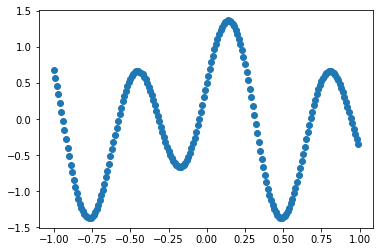

In [ ]:
x = np.arange(-1,1, 0.01)
np.random.shuffle(x)
y = np.sin(10*x) + 0.5 *np.cos(5*x)

plt.scatter(x,y)
plt.show()

### 데이터 나누기

In [ ]:
index = int(len(x)*0.8)

trainx, testx = x[:index], x[index:]
trainy, testy = y[:index], y[index:]

## 모델

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation="tanh"))
model.add(Dense(10, activation="tanh"))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'Adam', metrics = ["mae"])

In [ ]:
hist = model.fit(trainx,trainy, verbose = 0, epochs=1000, validation_split=0.1, batch_size =128)

## 학습 확인

### loss와 val_loss 확인

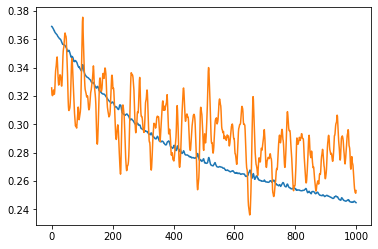

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

### mae와 val_mae 확인

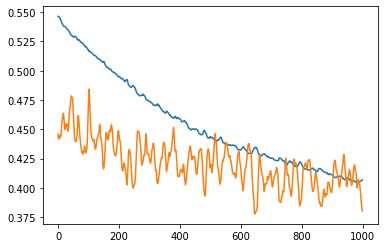

In [ ]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.show()

### 예측값 그래프로 그려보기

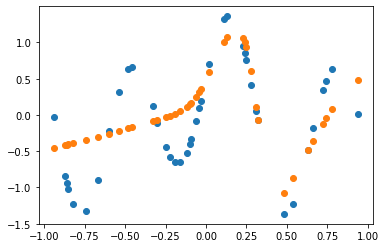

In [ ]:
y_ = model. predict(testx)
plt.scatter(testx, testy)
plt.scatter(testx, y_)
plt.show()

학습이 잘 안됨

-> epochs를 10배 늘려줌

## 모델 수정
학습량 10배 늘려줌

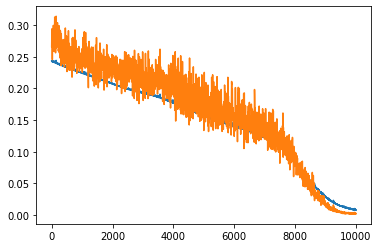

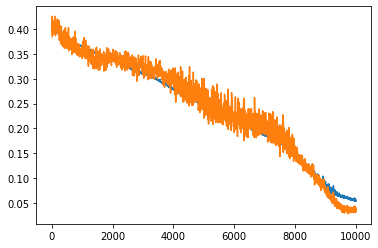

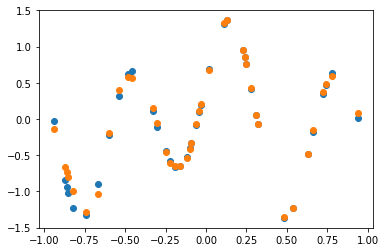

In [ ]:
hist = model.fit(trainx,trainy, verbose = 0, epochs=10000, validation_split=0.1, batch_size =128)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.show()

y_ = model. predict(testx)
plt.scatter(testx, testy)
plt.scatter(testx, y_)
plt.show()

학습이 훨씬 잘됨
loss와 mae 모두 줄어드는 추세로 안정적이어짐

# 다양한 입출력

## 2개의 입력 (독립변수 2개), 1개의 출력(종속변수 1개)
x1 + x2 -> y의 함수를 학습

x1과 x2는 0~1의 범위

### 데이터 준비

In [ ]:
x = np.ones((100,2))
x[:,0] = np.random.rand(100)
x[:,1] = np.random.rand(100)
y = np.sum(x, axis=1)

print(x[:10]) # x는 독립변수 2개 100줄
print(y[:10]) # y는 열이 1개 100개
print(x.shape)
print(y.shape)

[[0.40204605 0.11848065]
 [0.28458791 0.18592925]
 [0.22608659 0.33265922]
 [0.37831425 0.41581409]
 [0.0859332  0.04223406]
 [0.23759468 0.74411   ]
 [0.65379292 0.72532884]
 [0.46240096 0.74510811]
 [0.88654745 0.62340294]
 [0.75365478 0.49704251]]
[0.5205267  0.47051716 0.55874581 0.79412834 0.12816726 0.98170469
 1.37912176 1.20750907 1.50995038 1.25069729]
(100, 2)
(100,)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                30        
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
elapsed : 41.24807000160217
1/1 [==============================] - 0s 90ms/step - loss: 2.2088e-04 - mae: 0.0107
loss= 0.00022087660909164697
mae= 0.01068771630525589


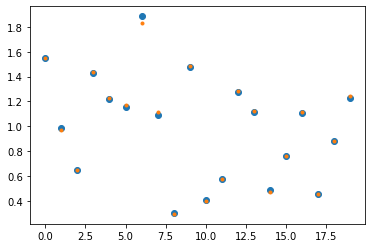

In [ ]:
# 훈련, 테스트 데이터 나누기
index = int(len(x)*0.8)
trainx, testx = x[:index], x[index:]
trainy, testy = y[:index], y[index:]

model = keras.Sequential()

# model.add(Input(1)) 입력이 1일때,
# Input을 2로 바꿔줌
model.add(Input(2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start = time.time()
model.fit(trainx, trainy, epochs=1000*5, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mae = model.evaluate(testx, testy)
print("loss=", loss)
print("mae=", mae)
              
y_ = model.predict(testx)

plt.plot(testy, 'o') # 큰 점 (정답)
plt.plot(y_, '.') # 작은점 (예측)
plt.show()

## 1개의 입력 (독립변수 1개), 2개의 출력 (종속변수 2개)
다음과 같이 y는 2개의 값을 갖고, 학습

y1 = x*2.0

y2 = x/2.0

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                20        
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 2)                 22        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.533847570419312
2/2 [==============================] - 0s 6ms/step - loss: 6.1461e-04 - mae: 0.0183
loss= 0.0006146082887426019
mae= 0.01830706000328064


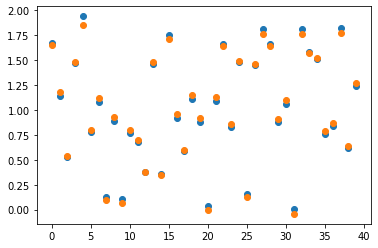

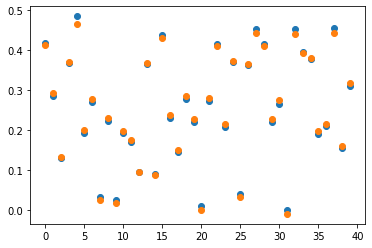

In [ ]:
# 종속변수가 두개
x = np.random.rand(100)
y = np.zeros((100,2))
y[:,0] = x*2.0
y[:,1] = x/2.0


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1)) 출력이 1일때,
# 출력을 2로 바꿔줌
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)
              
y_ = model.predict(test_x)

# y 두개를 따로 그래프로 나타냄
plt.plot(test_y[:,0], 'o')
plt.plot(y_[:,0], 'o')
plt.show()

plt.plot(test_y[:,1], 'o')
plt.plot(y_[:,1], 'o')
plt.show()

## 2개의 입력 (독립변수 2개), 2개의 출력 (종속변수 2개)
x1 + x2 -> z,

y1 = z*2, 

y2=z/2인 함수를 학습

x1과 x2는 0~1의 범위

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 10)                30        
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 2)                 22        
                                                                 
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.75427770614624
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0291
loss= 0.002155145863071084
mae= 0.029076015576720238


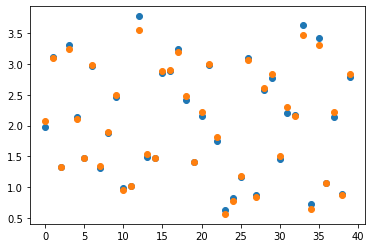

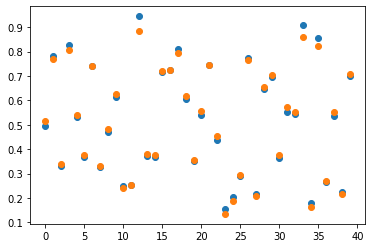

In [ ]:
x = np.ones((100,2))
x[:,0] = np.random.rand(100)
x[:,1] = np.random.rand(100)

z = np.sum(x, axis=1)

y = np.zeros((100,2))
y[:,0] = z*2.0
y[:,1] = z/2.0


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()

# 입출력을 2로 바꿔줌
# model.add(Input(1))
model.add(Input(2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)
              
y_ = model.predict(test_x)

plt.plot(test_y[:,0], 'o')
plt.plot(y_[:,0], 'o')
plt.show()

plt.plot(test_y[:,1], 'o')
plt.plot(y_[:,1], 'o')
plt.show()